In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Exploring the Titanic: Analyzing the Famous Dataset to Uncover Insights into the Tragic Voyage

The Titanic dataset is a classic dataset often used for exploratory data analysis (EDA). It contains data on passengers aboard the Titanic, including their demographics, cabin class, fare, and survival status.

Here are some steps you can take to perform EDA on the Titanic dataset:

<b> 1. Load the data:</b> Load the dataset into your preferred data analysis tool, such as Python or R.

<b> 2. Check for missing data:</b> Check if there are any missing values in the dataset. If so, you can decide how to handle them (e.g., imputing missing values, removing rows with missing values, etc.).

<b> 3. Check data types:</b>Check if the data types of each column are appropriate. For example, numeric columns should be represented as float or integer types, while categorical columns should be represented as string or categorical types.

<b> 4. Explore the data:</b> Explore the dataset by looking at descriptive statistics of the numerical columns and frequency distributions of the categorical columns. This will give you a general idea of the distribution of the data and help you identify any outliers or anomalies.

<b> 5. Visualize the data:</b> Create visualizations of the data to gain further insights. For example, you can create histograms to show the distribution of a numerical column, scatter plots to visualize the relationship between two numerical columns, and bar charts to show the frequency distribution of a categorical column.

<b> 6. Analyze relationships:</b> Analyze the relationships between different columns in the dataset. For example, you can investigate how survival rates vary based on demographic factors like age and sex, or how they vary based on the cabin class.

<b> 7. Draw conclusions:</b> Draw conclusions based on your analysis and communicate your findings. For example, you may find that women and children had a higher survival rate than men, or that passengers in higher cabin classes had a higher survival rate.

<b><font color="Blue"> ## By following these steps, you can perform a thorough EDA on the Titanic dataset and gain valuable insights into the data.</b></font>

The Titanic dataset is a famous dataset used for data analysis and machine learning tasks. It contains information about the passengers who were aboard the RMS Titanic when it sank on its maiden voyage in 1912. The dataset contains 891 rows and 12 columns of data, and it is often used as a sample dataset for learning data analysis techniques and machine learning algorithms.

<i><font color="light blue">The columns in the dataset include:

- PassengerId: A unique identifier for each passenger
- Survived: Whether the passenger survived (0 = No, 1 = Yes)
- Pclass: The passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: The passenger's name
- Sex: The passenger's sex
- Age: The passenger's age (in years)
- SibSp: The number of siblings/spouses the passenger had aboard the Titanic
- Parch: The number of parents/children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton) </i></font>

The goal of analyzing the Titanic dataset is often to explore relationships between different columns and to identify factors that may have contributed to a passenger's survival. For example, one might investigate whether passengers in higher classes had a higher survival rate, or whether women and children had a higher survival rate than men. By analyzing this dataset, we can gain insights into the events that occurred on the Titanic and draw conclusions about the factors that affected passengers' chances of survival.




### Importing the Dataset and Required Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Importing the dataset using pandas read_csv
df= pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning(Dropping column with null values, statistical analysis)

In [38]:
df.describe() #statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
df.info() #give us a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
# Check number of null values in a column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
#dropping column not in use and having maximum number of null values i.e. Cabin column

df_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
df_cleaned.describe() #cleaned data statistical summary

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Data Visualization(Scatter Plot, Bar Plot)

In [44]:
# Group the data frame by values in Survived column, and count the number of occurrences of each group.

survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

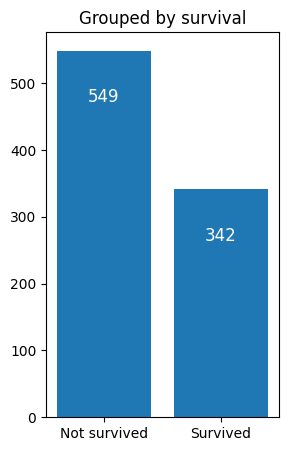

In [45]:
# Grouped by survival

plt.figure(figsize=(3,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

### For Ticket Class(Pclass) 

In [46]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.

pclass_count = df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

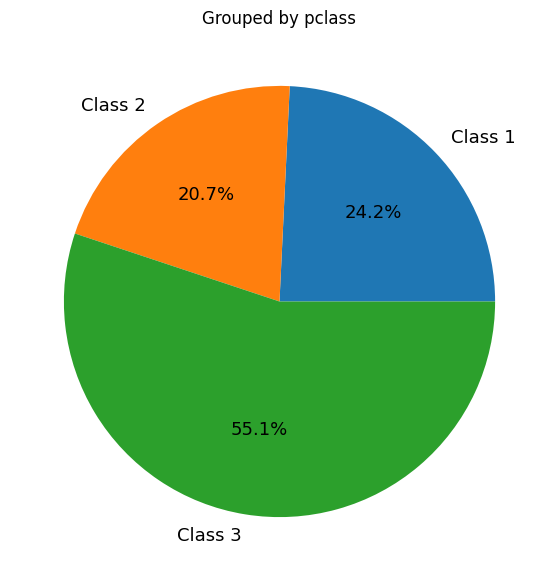

In [47]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()



### For Gender 

In [48]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.

sex_count = df.groupby('Sex')['Sex'].count()
sex_count


Sex
female    314
male      577
Name: Sex, dtype: int64

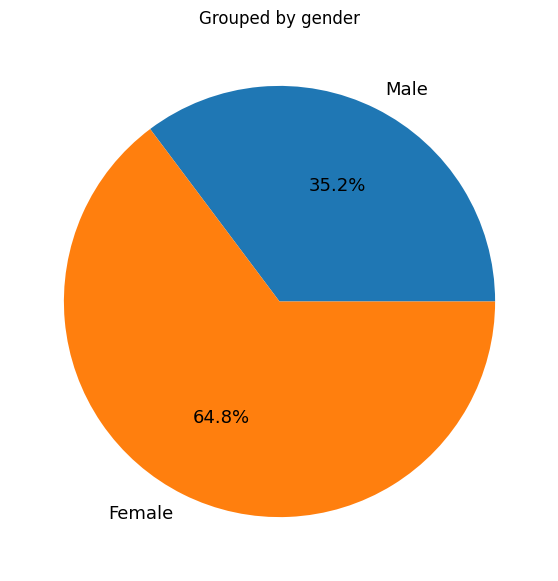

In [49]:
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['Male', 'Female'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

### For Port of Embarkation

In [50]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.

embark_count = df.groupby('Embarked')['Embarked'].count()
embark_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

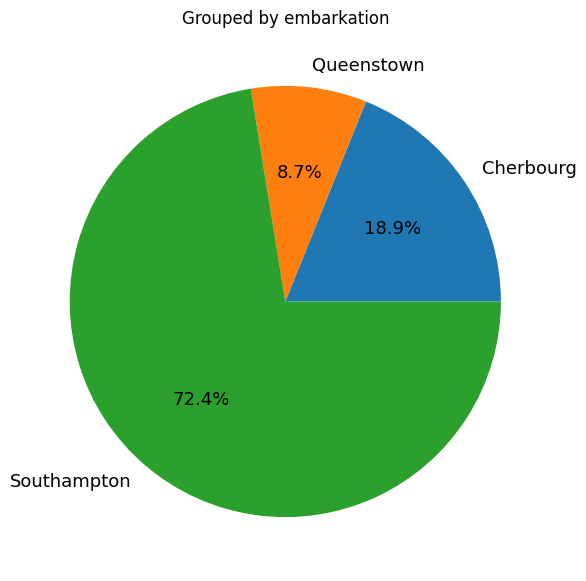

In [51]:
plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

<i> <font color="sky blue"> let's visualize the following questions:</i></font>

Did Gender play a role in Survival?

Did class played role in survival?





##### 1. Did Gender play a role in Survival?

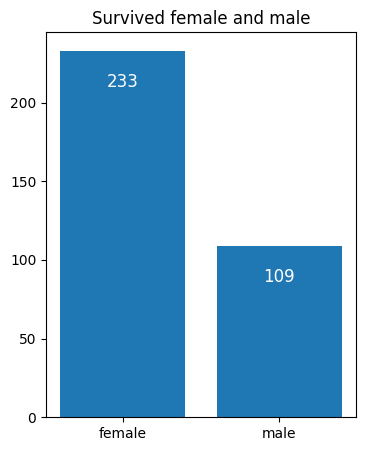

In [52]:
#Survivial number according to gender or sex i.e. Male and Female

survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

##### 2. Did class played role in survival?

In [53]:
grouped_by_pclass = df_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [54]:
df_cleaned.groupby(['Pclass'])['Survived'].sum()/df_cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

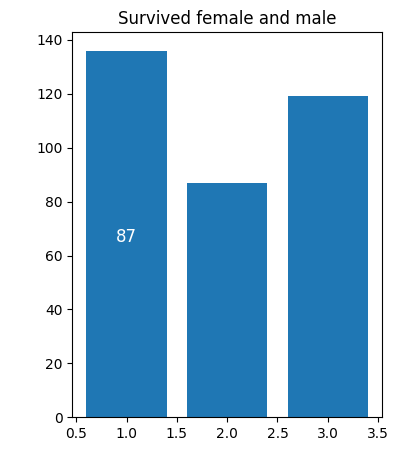

In [55]:
#Survivial number according to Pclass i.e. Male and Female

survived_Pclass = df_cleaned.groupby('Pclass')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_Pclass.index, survived_Pclass.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_Pclass.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In conclusion, the Titanic dataset provides a fascinating glimpse into the tragic events that took place aboard the ill-fated ship in 1912. Through the analysis of this dataset, we can gain valuable insights into the passengers' demographics, their social and economic status, and their chances of survival. 

The dataset reveals that passenger class was a critical factor in determining one's likelihood of survival, with first-class passengers having a significantly higher survival rate than those in the third class. Gender also played a vital role, with women being more likely to survive than men.

Moreover, the dataset highlights the importance of data cleaning and preprocessing in machine learning tasks. Handling missing values, outliers, and categorical data is critical to building accurate and reliable models.

Overall, the Titanic dataset is an excellent resource for researchers, students, and enthusiasts interested in data analysis, machine learning, and the history of the Titanic disaster. Its insights provide us with valuable lessons on human behavior, societal norms, and the consequences of inadequate safety measures, which can still be applied to modern-day scenarios. 